#Lab Exercise: 6
Perform Exploratory Data Analysis using following:
* Word Cloud
* Frequent Word Detection
* Keyword Extraction based on ranking 
* Dictionary Building
* N-gram tokenization

**Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:
#word cloud
!pip install wordcloud matplotlib pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


#Project Gutenberg is a library of over 60,000 free eBooks

#About projectgutenberg

This package contains a variety of scripts to make working with the Project Gutenberg body of public domain texts easier.

The functionality provided by this package includes:

Downloading texts from Project Gutenberg.

Cleaning the texts: removing all the crud, leaving just the text behind.

Making meta-data about the texts easily accessible.

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive

In [ ]:
nltk.download('gutenberg')  #Project Gutenberg is a library of over 60,000 free eBooks

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#1)Wordcloud

In [ ]:
# load the dataset
dataset = nltk.corpus.gutenberg.words('austen-emma.txt') #pick out the first text from projectGutenberg — Emma by Jane Austen 


len(dataset)
type(dataset)

nltk.corpus.reader.util.StreamBackedCorpusView

In [ ]:
print(dataset[:100])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her']


In [ ]:
# convert the dataset to a string
text = " ".join(dataset)

# tokenize the text data
tokens = word_tokenize(text)

# remove stop words and punctuation marks
stop_words = set(stopwords.words("english"))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# count the frequency of each word
word_counts = Counter(tokens)

In [ ]:
word_counts

Counter({'emma': 865,
         'jane': 301,
         'austen': 1,
         'volume': 3,
         'chapter': 56,
         'woodhouse': 313,
         'handsome': 38,
         'clever': 27,
         'rich': 14,
         'comfortable': 34,
         'home': 130,
         'happy': 125,
         'disposition': 24,
         'seemed': 141,
         'unite': 3,
         'best': 85,
         'blessings': 6,
         'existence': 8,
         'lived': 25,
         'nearly': 14,
         'twenty': 30,
         'one': 452,
         'years': 57,
         'world': 81,
         'little': 359,
         'distress': 19,
         'vex': 1,
         'youngest': 4,
         'two': 178,
         'daughters': 7,
         'affectionate': 9,
         'indulgent': 2,
         'father': 207,
         'consequence': 27,
         'sister': 33,
         'marriage': 35,
         'mistress': 11,
         'house': 95,
         'early': 41,
         'period': 18,
         'mother': 72,
         'died': 4,
         'long':

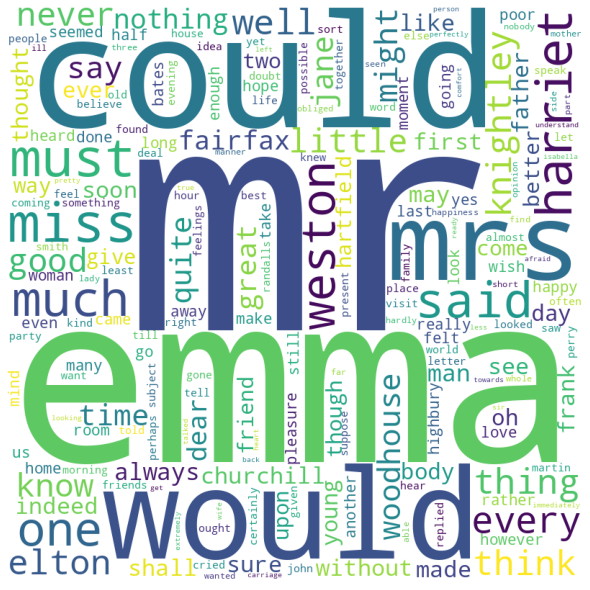

In [ ]:
from wordcloud import WordCloud
# generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                      stopwords=stop_words, min_font_size=10).generate_from_frequencies(word_counts)

# plot the WordCloud image                        
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show() 

#2)Frequent Word Detection:

In [ ]:
import nltk
from collections import Counter

# load the corpus dataset
nltk.download('gutenberg')
corpus = nltk.corpus.gutenberg

# tokenize the text data
text = " ".join(corpus.words())
tokens = nltk.word_tokenize(text)

# remove stop words and punctuation marks
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# count the frequency of each word
word_counts = Counter(tokens)

# sort the words based on their frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_words[:10]:
    print(f"{word}: {freq}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


shall: 11682
said: 9429
unto: 9010
lord: 8590
thou: 6759
one: 6218
man: 5615
thy: 5609
god: 5287
thee: 4807


#3)Keyword Extraction based on Ranking

In [ ]:
!pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from rake_nltk import Rake
from nltk.corpus import stopwords

# load the corpus dataset
nltk.download('gutenberg')
corpus = nltk.corpus.gutenberg

# tokenize the text data
text = " ".join(corpus.words())

# remove stop words and punctuation marks
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


#Rapid Keyword Extraction (RAKE)
* RAKE is a Domain-Independent keyword extraction algorithm in Natural Language Processing.

* It is an Individual document-oriented dynamic Information retrieval method.

* Concept of RAKE is built on three matrices Word Degree (deg(w)), Word Frequency (freq(w)), Ratio of the degree to frequency (deg(w)/freq(w)).



Once we have the text corpus, RAKE splits the text into a list of words, removing stop words from the same list. Return list is known as Content Words. 

Content_Word= Corpus – [Stopwords , Delimiter]

Detailed explanation is available at https://www.analyticsvidhya.com/blog/2021/10/rapid-keyword-extraction-rake-algorithm-in-natural-language-processing/ 

In [ ]:
# generate a list of keywords using RAKE
r = Rake(stopwords=stop_words)
r.extract_keywords_from_text(text)
keywords = r.get_ranked_phrases()

# print the top 10 keywords
print(keywords[:10])


['progress (* means estimated ): ebooks year month 1 1971 july 10 1991 january 100 1994 january 1000 1997 august 1500 1998 october 2000 1999 december 2500 2000 december 3000 2001 november 4000 2001 october', '.-- _she_ _felt_ _the_ _engagement_ _to_ _be_ _a_ _source_ _of_ _repentance_ _and_ _misery_ _to_ _each_', 'tutte le gran faciende si fanno di poca cosa', 'mais pas plus fin que tous les autres ."', 'toute leur etude etait de se complaire et de', 'pagens ont tort et chretiens ont droit ."', 'la vita il fine ,-- e di loda la sera', 'la mala compagnia e quella che mena uomini', 'project gutenberg literary archive foundation pmb 113 1739 university ave', 'strong hymn eine feste burg ist unser gott']


#4)Dictionary Building

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import wordnet as wn

# load the corpus dataset
nltk.download('gutenberg')
corpus = nltk.corpus.gutenberg

# tokenize the text data
text = " ".join(corpus.words())
tokens = nltk.word_tokenize(text)

# remove stop words and punctuation marks
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# identify the parts of speech for each word
pos_tags = nltk.pos_tag(tokens)

# create a list of words with their definitions using WordNet
dictionary = {}
for word, tag in pos_tags:
    synsets = wn.synsets(word)
    if synsets:
        definition = synsets[0].definition()
        dictionary[word] = definition

# print the dictionary
for word, definition in dictionary.items():
    print(f"{word}: {definition}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Streaming output truncated to the last 5000 lines.
detestation: hate coupled with disgust
ignoramus: an ignorant person
satirizing: ridicule with satire
conjures: summon into action or bring into existence, often as if by magic
confining: place limits on (extent or access)
diddled: deprive of by deceit
bordeaux: a port city in southwestern France; a major center of the wine trade
slacking: the evasion of work or duty
excavation: the act of digging
pottery: ceramic ware made from clay and baked in a kiln
loam: a rich soil consisting of a mixture of sand and clay and decaying organic materials
dent: an appreciable consequence (especially a lessening)
druggist: a health professional trained in the art of preparing and dispensing drugs
soils: the state of being covered with unclean things
odorless: having no odor
waxy: made of or covered with wax
perfumery: perfumes in general
pomatum: hairdressing consisting of a perfumed oil or ointment
grains: a relatively small granular particle of a s

#5)N-gram Tokenization

In [ ]:
import nltk
nltk.download('punkt')

from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('webtext')
dataset = webtext.raw()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [ ]:
unigrams = nltk.word_tokenize(dataset)
bigrams = list(ngrams(unigrams, 2))
trigrams = list(ngrams(unigrams, 3))


In [ ]:
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)


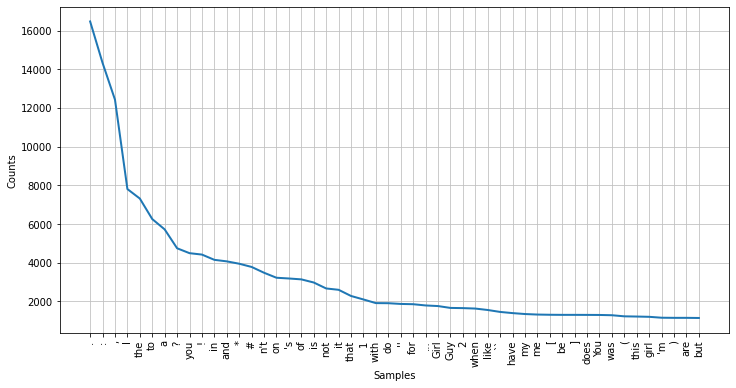

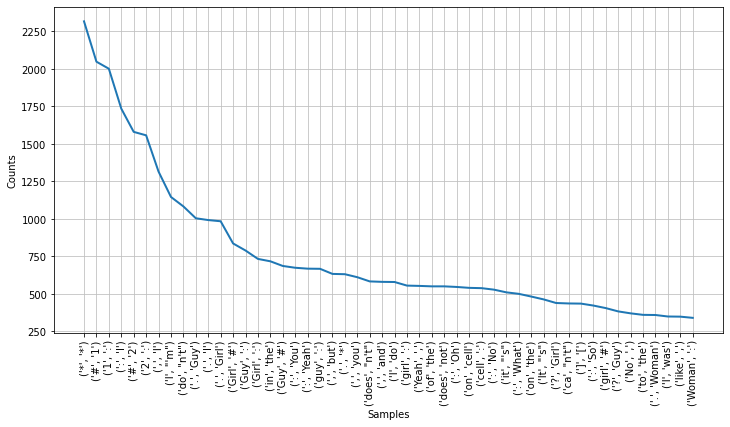

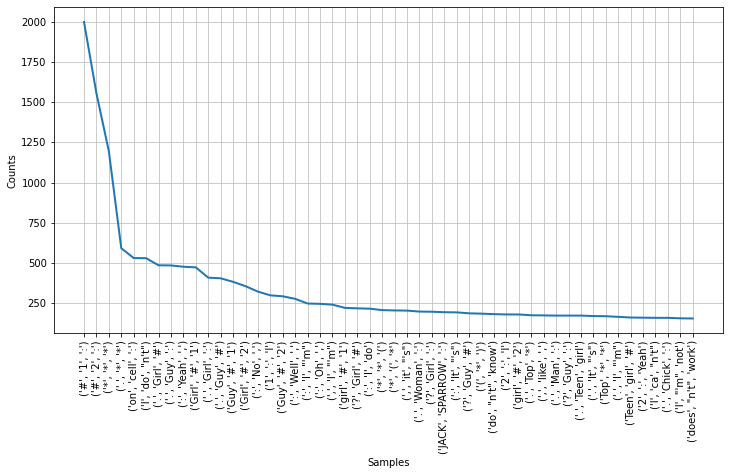

In [ ]:
# Unigram frequency distribution
plt.figure(figsize=(12, 6))
unigram_freq.plot(50, cumulative=False)
plt.show()

# Bigram frequency distribution
plt.figure(figsize=(12, 6))
bigram_freq.plot(50, cumulative=False)
plt.show()

# Trigram frequency distribution
plt.figure(figsize=(12, 6))
trigram_freq.plot(50, cumulative=False)
plt.show()
